## What is a "backend"?
Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras.

At this time, Keras has two backend implementations available: the TensorFlow backend and the Theano backend.

* TensorFlow is an open-source symbolic tensor manipulation framework developed by Google, Inc.
* Theano is an open-source symbolic tensor manipulation framework developed by LISA/MILA Lab at Université de Montréal.

The default configuration file looks like this:

```
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}
```

Simply change the field backend to either "theano" or "tensorflow", and Keras will use the new configuration next time you run any Keras code.

To import backend from keras :

In [1]:
from tensorflow.keras import backend as K

The code below instantiates an input placeholder. It's equivalent to tf.placeholder() or th.tensor.matrix(), th.tensor.tensor3(), etc.

In [68]:
input1 = K.placeholder(shape=(2, 4, 5))
# also works:
input2 = K.placeholder(shape=(None, 4, 5))
# also works:
input3 = K.placeholder(ndim=3)
print(input1, input2, input3, sep='\n')

KerasTensor(type_spec=TensorSpec(shape=(2, 4, 5), dtype=tf.float32, name=None), description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, None), dtype=tf.float32, name=None), description="created by layer 'input_3'")


The code below instantiates a shared variable. It's equivalent to tf.Variable() or th.shared().

In [ ]:
import numpy as np
val = np.random.random((3, 4, 5))
var1 = K.variable(value=val)

# all-zeros variable:
var2 = K.zeros(shape=(3, 4, 5))
# all-ones:
var3 = K.ones(shape=(3, 4, 5))

print(var1, var2, var3, sep = '\n')

<tf.Variable 'Variable:0' shape=(3, 4, 5) dtype=float32>
<tf.Variable 'Variable_1:0' shape=(3, 4, 5) dtype=float32>
<tf.Variable 'Variable_2:0' shape=(3, 4, 5) dtype=float32>


Most tensor operations you will need can be done as you would in TensorFlow or Theano:

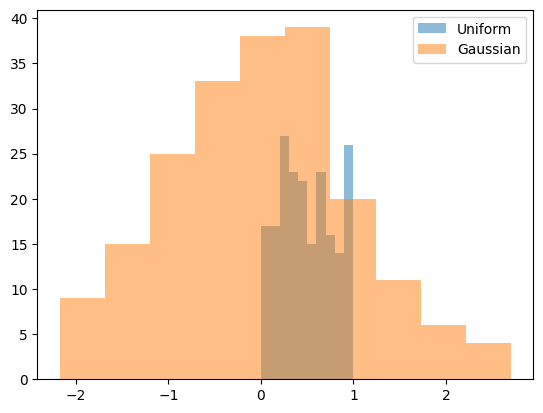

In [31]:
# Initializing Tensors with Random Numbers
b = K.random_uniform_variable(shape=(100, 2), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(100, 2), mean=0, scale=1) # Gaussian distribution
import matplotlib.pyplot as plt
plt.hist(b.numpy().flatten(), label = 'Uniform', alpha = 0.5)
plt.hist(c.numpy().flatten(), label = 'Gaussian', alpha = 0.5)
plt.legend();

In [37]:
# Tensor Arithmetics
a = b + c * K.abs(c)
a_b_dot = K.dot(a, K.transpose(b))
b_sum = K.sum(b, axis=1)
a_softmax = K.softmax(b)
x = K.concatenate([b, c], axis=-1)
print(b.shape, c.shape, x.shape)
# etc...

(100, 2) (100, 2) (100, 4)


In [28]:
?K.concatenate

Signature: K.concatenate(tensors, axis=-1)
Docstring:
Concatenates a list of tensors alongside the specified axis.

Args:
    tensors: list of tensors to concatenate.
    axis: concatenation axis.

Returns:
    A tensor.

Example:

    >>> a = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    >>> b = tf.constant([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
    >>> tf.keras.backend.concatenate((a, b), axis=-1)
    <tf.Tensor: shape=(3, 6), dtype=int32, numpy=
    array([[ 1,  2,  3, 10, 20, 30],
           [ 4,  5,  6, 40, 50, 60],
           [ 7,  8,  9, 70, 80, 90]], dtype=int32)>
File:      c:\users\dhruv\desktop\env\venv\lib\site-packages\keras\backend.py
Type:      function


## Backend functions

In [38]:
K.backend()

'tensorflow'

In [39]:
# K.set_epsilon(1e-5)
K.epsilon()

1e-07

In [40]:
# K.set_floatx('float16')
K.floatx()

'float32'

In [42]:
arr = np.array([1.0, 2.0], dtype='float64')
arr.dtype

dtype('float64')

In [43]:
new_arr = K.cast_to_floatx(arr)
new_arr

array([1., 2.], dtype=float32)

In [51]:
K.is_keras_tensor(a)

False

In [56]:
keras_placeholder = K.placeholder(shape=(2, 4, 5))
K.is_keras_tensor(keras_placeholder)

True

In [53]:
?K.is_keras_tensor

Signature: K.is_keras_tensor(x)
Docstring:
Returns whether `x` is a Keras tensor.

A "Keras tensor" is a tensor that was returned by a Keras layer,
(`Layer` class) or by `Input`.

Args:
    x: A candidate tensor.

Returns:
    A boolean: Whether the argument is a Keras tensor.

Raises:
    ValueError: In case `x` is not a symbolic tensor.

Examples:

>>> np_var = np.array([1, 2])
>>> # A numpy array is not a symbolic tensor.
>>> tf.keras.backend.is_keras_tensor(np_var)
Traceback (most recent call last):
...
ValueError: Unexpectedly found an instance of type
`<class 'numpy.ndarray'>`.
Expected a symbolic tensor instance.
>>> keras_var = tf.keras.backend.variable(np_var)
>>> # A variable created with the keras backend is not a Keras tensor.
>>> tf.keras.backend.is_keras_tensor(keras_var)
False
>>> keras_placeholder = tf.keras.backend.placeholder(shape=(2, 4, 5))
>>> # A placeholder is a Keras tensor.
>>> tf.keras.backend.is_keras_tensor(keras_placeholder)
True
>>> keras_input = tf.keras.

In [57]:
# Resets the TF graph
K.clear_session()

In [69]:
# The learning phase flag is a bool tensor (0 = test, 1 = train)
# set_learning_phase(value)
K.learning_phase()

0

## How can I obtain the output of an intermediate layer?
One simple way is to create a new Model that will output the layers that you are interested in:

In [82]:
from keras.models import Model, Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(3,), name='dense_1'))
model.add(Dense(10, name='dense_2'))
model.add(Dense(10, name='dense_3'))
model.add(Dense(10, name='dense_4'))
model.add(Dense(10, name='dense_5'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


1. First way is to create another Model object with inputs as model input and output as intrermediate layer output

In [70]:
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_output = intermediate_layer_model.predict(np.array([[1,2,3]]))

intermediate_output

1/1 [==============================] - 0s 33ms/step


array([[ 0.10436258,  0.01025522,  0.659142  , -0.72244346, -2.2823668 ,
        -2.6160698 ,  0.8206099 ,  3.0555387 ,  0.8985908 ,  1.0663377 ]],
      dtype=float32)

2. Alternatively, you can build a Keras function that will return the output of a certain layer given a certain input, for example:

In [63]:
model.layers[0].input

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_1_input')>

In [71]:
# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.get_layer(layer_name).output])
layer_output = get_3rd_layer_output([np.array([[1,2,3]])])

print(layer_output, layer_output[0], sep = '\n')

[array([[ 0.10436258,  0.01025522,  0.659142  , -0.72244346, -2.2823668 ,
        -2.6160698 ,  0.8206099 ,  3.0555387 ,  0.8985908 ,  1.0663377 ]],
      dtype=float32)]
[[ 0.10436258  0.01025522  0.659142   -0.72244346 -2.2823668  -2.6160698
   0.8206099   3.0555387   0.8985908   1.0663377 ]]


3. Note that if your model has a different behavior in training and testing phase (e.g. if it uses Dropout, BatchNormalization, etc.), you will need to pass the learning phase flag to your function:

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = np.array([[1,2,3]])

get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[3].output])

# output in test mode = 0
layer_output_0 = get_3rd_layer_output([X, 0])[0]

# output in train mode = 1
layer_output_1 = get_3rd_layer_output([X, 1])[0]

print(layer_output_0, layer_output_1, sep = '\n')

Finally using eval will also work, and get_value will work for variables

In [87]:
kvar = K.variable(np.array([[1, 2], [3, 4]]), dtype='float32')
K.eval(kvar)

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [88]:
K.count_params(kvar)

4

In [89]:
# K.set_value()
K.get_value(kvar)

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.enable_v2_behavior()
import numpy as np
K.get_value(K.maximum(K.variable(np.array([1, 2])), K.variable(np.array([2, 3]))))

array([2., 3.], dtype=float32)

## References
[Notebook](https://github.com/knathanieltucker/a-bit-of-deep-learning-and-keras/blob/master/notebooks/Backend.ipynb)

In [4]:
import tensorflow as tf
import numpy as np
from keras import backend as K

a = np.array([1, 2])
b = np.array([2, 3])
x = K.concatenate([K.variable(a), K.variable(b)])
type(K.eval(a))

numpy.ndarray

In [9]:
K.expand_dims(a, 0)

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [6]:
K.reshape(a, [-1, 1])

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[1],
       [2]])>

In [7]:
49 * 8

392

In [8]:
7* 7* 2* 4

392

In [11]:
c = K.variable(np.random.randn(7 , 7 , 8))
K.reshape(c, [-1, 7, 7, 2, 4])

<tf.Tensor: shape=(1, 7, 7, 2, 4), dtype=float32, numpy=
array([[[[[ 1.1641135e+00, -4.1975161e-01,  8.9411747e-01,
            7.5477403e-01],
          [ 6.5532416e-01, -1.6234163e+00,  1.8705670e+00,
            1.3963423e+00]],

         [[ 9.6195310e-01, -8.1316501e-01, -6.8411976e-01,
           -4.6323553e-01],
          [ 1.7951530e+00,  9.5891404e-01,  4.0272656e-01,
           -1.6583543e+00]],

         [[ 3.9341369e-01,  2.9993808e-01,  5.7547098e-01,
           -8.0094773e-01],
          [-2.2743055e-01, -8.6571908e-01,  1.8017144e+00,
            9.2368799e-01]],

         [[ 1.0051535e+00, -1.1410729e+00, -4.9820939e-01,
            3.5138562e-01],
          [ 9.0464818e-01, -1.1050223e-01, -1.9387984e+00,
            5.0152367e-01]],

         [[ 1.2343670e+00, -3.9768276e-01,  1.8121946e+00,
           -3.8284671e-01],
          [ 4.2819136e-01, -1.8121368e-01,  5.2577662e-01,
            5.6427062e-01]],

         [[-9.3371904e-01,  1.0720987e+00, -7.1441524e-02,
    

In [19]:
K.reshape(a, [-1, 2, 1, 1])

<tf.Tensor: shape=(1, 2, 1, 1), dtype=int32, numpy=
array([[[[1]],

        [[2]]]])>